In [4]:
import cv2 as cv2 # Pour importer une image


## Show image : 

In [5]:
img = cv2.imread("C:/Users/Seyf/Documents/Notebooks/Mes notebooks/Python/Deep Learning/Photo/dog1.jpg")

In [6]:
cv2.imshow('Dog', img)
cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window


In [7]:
img.shape

(666, 500, 3)

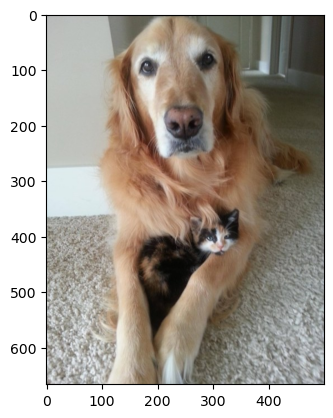

In [8]:
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
from matplotlib.pyplot import imshow
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image)

## Show Video Webcam:

In [9]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

## Show video from file : 

In [11]:
import numpy as np
cap = cv2.VideoCapture('C:/Users/Seyf/Documents/Notebooks/Mes notebooks/Python/Deep Learning/Photo/Video.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Resize : 


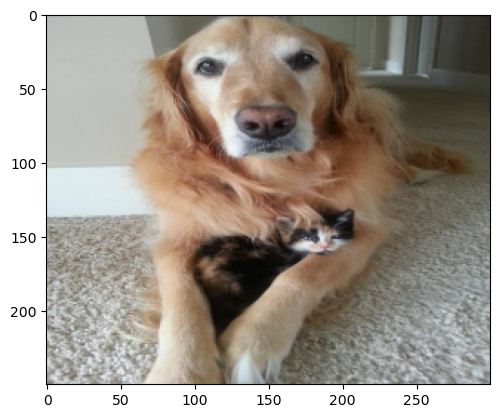

In [12]:
# 1st method : tuple
dsize = (300,250)
img_resized = cv2.resize(image, dsize)
plt.imshow(img_resized)

In [13]:
img_resized.shape

(250, 300, 3)

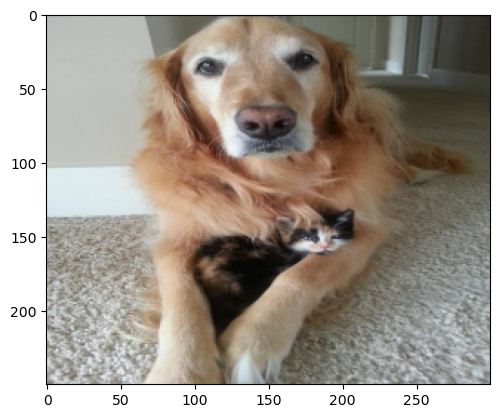

In [14]:
def rescaleFrame(frame, scale = 0.7):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions = (width, height)
    
    return cv2.resize(frame, dimensions, interpolation = cv2.INTER_AREA)

resized_image = rescaleFrame(image)
plt.imshow(img_resized)

## Image transformation : 

### translation

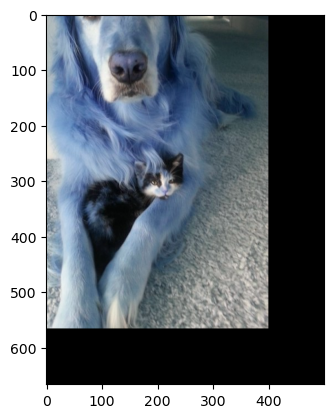

In [20]:
import numpy as np

def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], image.shape[0])
    return cv2.warpAffine(img, transMat, dimensions)
# -x -> left
# -y -> up
# x -> right
# y -> down

dog = cv2.imread("C:/Users/Seyf/Documents/Notebooks/Mes notebooks/Python/Deep Learning/Photo/dog1.jpg")
translated = translate(dog, -100, -100)
plt.imshow(translated)

### Rotation 

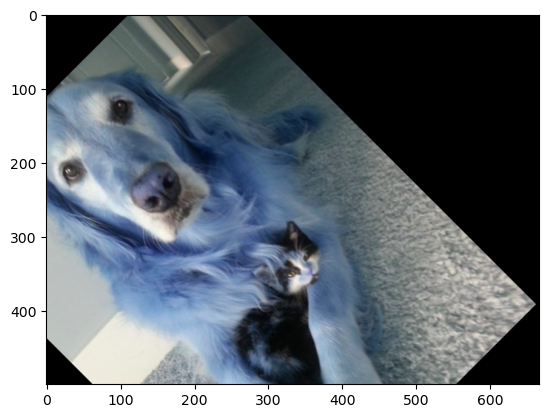

In [21]:
def rotation(img, angle, rotPoint = None):
    (height, widht) = img.shape[:2]
    
    if rotPoint is None : 
        rotPoint= (widht//2, height//2)
        
    rotMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0 )
    dimensions = (height, widht)
    return cv2.warpAffine(img, rotMat, dimensions)
# -x -> left
# -y -> up
# x -> right
# y -> down

dog = cv2.imread("C:/Users/Seyf/Documents/Notebooks/Mes notebooks/Python/Deep Learning/Photo/dog1.jpg")
rotated = rotation(dog,45)
plt.imshow(rotated)

### Resizing

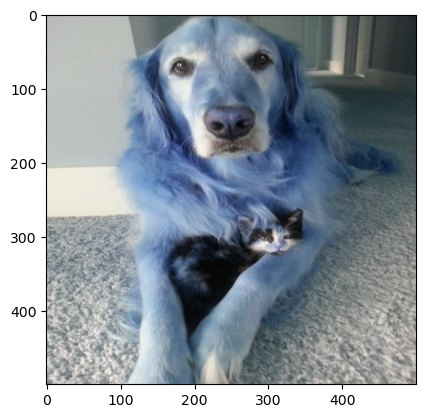

In [23]:
dog = cv2.imread("C:/Users/Seyf/Documents/Notebooks/Mes notebooks/Python/Deep Learning/Photo/dog1.jpg")
resized = cv2.resize(dog, (500,500), interpolation = cv.INTER_CUBIC)
plt.imshow(resized)

## face detection

In [9]:
import cv2 as cv2 # Pour importer une image


man = cv2.imread("C:/Users/Seyf/Documents/Notebooks/Mes notebooks/Python/Deep Learning/Photo/man.jpg")
cv2.imshow('man', man)

grey = cv2.cvtColor(man, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray Man', grey)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


faces_rect = face_cascade.detectMultiScale(grey, scaleFactor = 1.1, minNeighbors =3)

print(f'number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv2.rectangle(man, (x,y), (x+w, y+h), (0,255,0), thickness =2)

cv2.imshow('detected face', man)


cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window


number of faces found = 2


In [5]:
import cv2 as cv2 # Pour importer une image


groupe = cv2.imread("C:/Users/Seyf/Documents/Notebooks/Mes notebooks/Python/Deep Learning/Photo/groupe.jpg")
cv2.imshow('groupe', groupe)

groupe_grey = cv2.cvtColor(groupe, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


faces_rect = face_cascade.detectMultiScale(groupe_grey, scaleFactor = 1.1, minNeighbors =10)
#eye_rect = eye_cascade.detectMultiScale(groupe_grey, scaleFactor = 1.1, minNeighbors =10)

print(f'number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv2.rectangle(groupe_grey, (x,y), (x+w, y+h), (0,255,0), thickness =2)
    
cv2.imshow('detected face', groupe_grey)


cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window


number of faces found = 6


## facecam detection

In [3]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


